## Project 1, Group 3 - Places to Bike
Overview
Biking is becoming more prevalent as a form of commuting to work, exercise, traveling, and for leisure. In this project, our group explored cities that were considered "bike-friendly" based on the Places for Bikes city ratings to see if there is any relationships to obesity rates in the U.S.

In [100]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import gmaps

#from config import gkey

from datetime import datetime

### Bike Friendlines Score data

In [101]:
# Store filepath as variable
places_for_bikes = "data/places_for_bikes_results.csv"

In [102]:
# Read data with Pandas
bike_data = pd.read_csv(places_for_bikes, encoding="ISO-8859-1")

# Display 10 rows of data
bike_data.head(5)

,Places_ID_2019,City,City_Alt,ACS Bike-to-Work Mode Share,Land Area,Population,ACS Target,ACS Normalized Score,ACS Ridership Points,SMS Recreation Riding,...,ACS Bike-to-Work Mode Share Men,ACS Bike-to-Work Mode Share Women,ACS Gap,ACS Tier,ACS_Target,Distance.1,ACS Points,Total Reach Points,Bonus,Total Ponts
0,363,"SPRINGDALE, ARKANSAS","SPRINGDALE, AR",0.30%,41.8,"77,252",12.60%,1.7,0.1,12.40%,...,0.01,0.00,0.01,1.0,-0.02,0.03,1.0,4.0,0.5,3.0
1,116,"ENID, OKLAHOMA","ENID, OK",0.70%,73.7,"50,809",11.50%,5.5,0.3,13.00%,...,0.01,0.00,0.01,2.0,-0.05,0.06,1.2,3.8,0.0,2.4
2,108,"DUBUQUE, IOWA","DUBUQUE, IA",0.40%,30.0,"58,410",20.80%,2.0,0.1,16.50%,...,0.00,0.00,0.00,1.0,-0.02,0.02,1.7,3.8,0.0,2.1
3,357,"SOUTH BEND, INDIANA","SOUTH BEND, IN",1.30%,41.5,"101,928",12.60%,7.8,0.4,15.80%,...,0.02,0.01,0.02,3.0,-0.60,0.62,3.1,3.7,0.0,2.0
4,1205,"CRESTED BUTTE, COLORADO","CRESTED BUTTE, CO",41.10%,0.8,"1,385",51.00%,75.6,3.8,18.80%,...,0.36,0.52,-0.16,3.0,-0.60,0.44,3.6,3.6,0.0,2.6


In [103]:
# Renaming column
bike_data_df = bike_data.rename(columns={"Total Ponts":"Total Points", " Population ":"Population"})
bike_data_df.head()

,Places_ID_2019,City,City_Alt,ACS Bike-to-Work Mode Share,Land Area,Population,ACS Target,ACS Normalized Score,ACS Ridership Points,SMS Recreation Riding,...,ACS Bike-to-Work Mode Share Men,ACS Bike-to-Work Mode Share Women,ACS Gap,ACS Tier,ACS_Target,Distance.1,ACS Points,Total Reach Points,Bonus,Total Points
0,363,"SPRINGDALE, ARKANSAS","SPRINGDALE, AR",0.30%,41.8,"77,252",12.60%,1.7,0.1,12.40%,...,0.01,0.00,0.01,1.0,-0.02,0.03,1.0,4.0,0.5,3.0
1,116,"ENID, OKLAHOMA","ENID, OK",0.70%,73.7,"50,809",11.50%,5.5,0.3,13.00%,...,0.01,0.00,0.01,2.0,-0.05,0.06,1.2,3.8,0.0,2.4
2,108,"DUBUQUE, IOWA","DUBUQUE, IA",0.40%,30.0,"58,410",20.80%,2.0,0.1,16.50%,...,0.00,0.00,0.00,1.0,-0.02,0.02,1.7,3.8,0.0,2.1
3,357,"SOUTH BEND, INDIANA","SOUTH BEND, IN",1.30%,41.5,"101,928",12.60%,7.8,0.4,15.80%,...,0.02,0.01,0.02,3.0,-0.60,0.62,3.1,3.7,0.0,2.0
4,1205,"CRESTED BUTTE, COLORADO","CRESTED BUTTE, CO",41.10%,0.8,"1,385",51.00%,75.6,3.8,18.80%,...,0.36,0.52,-0.16,3.0,-0.60,0.44,3.6,3.6,0.0,2.6


In [104]:
# Splitting City column to two new columns - City Name and State
#bike_split = bike_data_df
#bike_split[['City Name','State']] = bike_split["City"].str.split(",", n=1, expand=True)
#bike_split.head()

In [105]:
# Re-organizing columns and keeping columns that are relevant to our research question. In this dataframe
# we only want to focus on these columns in this dataset: City_Alt, Population, and Total Bike Friendly Points.
bike_df = bike_data_df[['City_Alt', 'Population', 'Total Points']]

bike_df.head(10)

,City_Alt,Population,Total Points
0,"SPRINGDALE, AR","77,252",3.0
1,"ENID, OK","50,809",2.4
2,"DUBUQUE, IA","58,410",2.1
3,"SOUTH BEND, IN","101,928",2.0
4,"CRESTED BUTTE, CO","1,385",2.6
5,"KALAMAZOO, MI","75,833",1.9
6,"SPRINGFIELD, MO","165,785",1.9
7,"SAN JUAN CAPISTRANO, CA","35,948",1.9
8,"CHARLOTTESVILLE, VA","46,487",1.8
9,"BENTONVILLE, AR","44,601",3.1


In [106]:
# Sort dataframe based on Total Points scored and Population size for Bike Friendliness
#bike_total_points = bike_df.sort_values(["Total Points", "Population"], ascending=[False, False])
#bike_total_points.head(10)

### Obesity Rate data

In [107]:
# Importing raw data for Obesity Rates
obesity_raw_data = "data/obesity_among_adults.csv"

In [108]:
# Read raw data into CSV file
obesity_data = pd.read_csv(obesity_raw_data, encoding="ISO-8859-1")
obesity_data.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,CO,Colorado,Boulder,City,BRFSS,Unhealthy Behaviors,807850,Obesity among adults aged >=18 Years,%,...,NaN,14.6,15.1,"97,385","(40.0275510494, -105.25151776)",UNHBEH,OBESITY,807850,NaN,Obesity
1,2016,CA,California,Fremont,City,BRFSS,Unhealthy Behaviors,626000,Obesity among adults aged >=18 Years,%,...,NaN,15.6,15.8,"214,089","(37.5278685405, -121.984121512)",UNHBEH,OBESITY,626000,NaN,Obesity
2,2016,CA,California,Milpitas,City,BRFSS,Unhealthy Behaviors,647766,Obesity among adults aged >=18 Years,%,...,NaN,15.7,16.2,"66,790","(37.433869763, -121.892083025)",UNHBEH,OBESITY,647766,NaN,Obesity
3,2016,CA,California,Irvine,City,BRFSS,Unhealthy Behaviors,636770,Obesity among adults aged >=18 Years,%,...,NaN,16.2,16.5,"212,375","(33.6780108904, -117.773633283)",UNHBEH,OBESITY,636770,NaN,Obesity
4,2016,CA,California,San Francisco,City,BRFSS,Unhealthy Behaviors,667000,Obesity among adults aged >=18 Years,%,...,NaN,17.1,17.2,"805,235","(37.7559136611, -122.440987876)",UNHBEH,OBESITY,667000,NaN,Obesity


In [109]:
# Re-naming column to align with Bike Friendly dataset.
obesity_data_rn = obesity_data.rename(columns={"StateDesc":"State", "CityName":"City Name",
                                               "Data_Value":"Obesity Rank", "PopulationCount":"Population"})

obesity_data_rn.head()

,Year,StateAbbr,State,City Name,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Population,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,CO,Colorado,Boulder,City,BRFSS,Unhealthy Behaviors,807850,Obesity among adults aged >=18 Years,%,...,NaN,14.6,15.1,"97,385","(40.0275510494, -105.25151776)",UNHBEH,OBESITY,807850,NaN,Obesity
1,2016,CA,California,Fremont,City,BRFSS,Unhealthy Behaviors,626000,Obesity among adults aged >=18 Years,%,...,NaN,15.6,15.8,"214,089","(37.5278685405, -121.984121512)",UNHBEH,OBESITY,626000,NaN,Obesity
2,2016,CA,California,Milpitas,City,BRFSS,Unhealthy Behaviors,647766,Obesity among adults aged >=18 Years,%,...,NaN,15.7,16.2,"66,790","(37.433869763, -121.892083025)",UNHBEH,OBESITY,647766,NaN,Obesity
3,2016,CA,California,Irvine,City,BRFSS,Unhealthy Behaviors,636770,Obesity among adults aged >=18 Years,%,...,NaN,16.2,16.5,"212,375","(33.6780108904, -117.773633283)",UNHBEH,OBESITY,636770,NaN,Obesity
4,2016,CA,California,San Francisco,City,BRFSS,Unhealthy Behaviors,667000,Obesity among adults aged >=18 Years,%,...,NaN,17.1,17.2,"805,235","(37.7559136611, -122.440987876)",UNHBEH,OBESITY,667000,NaN,Obesity


In [110]:
# Create new dataframe with needed columns 
obesity_data_df = obesity_data_rn[['City Name', 'State', 'Population', 'Obesity Rank']]

# Sort columns based on Obesity Rank
obesity_data_df = obesity_data_df.sort_values(["Obesity Rank"], ascending=[True])

# Combining two columns into one to match with column from the Total Bike Score table to allow correct merge
obesity_data_df['City_Alt'] = obesity_data_df['City Name'] + ", " + obesity_data_rn['StateAbbr']

# Making new column all upper case to match with column from Total Bike Score table to allow correct merge
obesity_data_df['City_Alt'] = obesity_data_df['City_Alt'].str.upper()

obesity_data_df.head()

,City Name,State,Population,Obesity Rank,City_Alt
0,Boulder,Colorado,"97,385",14.9,"BOULDER, CO"
1,Fremont,California,"214,089",15.7,"FREMONT, CA"
2,Milpitas,California,"66,790",16.0,"MILPITAS, CA"
3,Irvine,California,"212,375",16.4,"IRVINE, CA"
4,San Francisco,California,"805,235",17.1,"SAN FRANCISCO, CA"


In [111]:
# Show bike table again for easy comparision with obesity table above
bike_df.head()

,City_Alt,Population,Total Points
0,"SPRINGDALE, AR","77,252",3.0
1,"ENID, OK","50,809",2.4
2,"DUBUQUE, IA","58,410",2.1
3,"SOUTH BEND, IN","101,928",2.0
4,"CRESTED BUTTE, CO","1,385",2.6


### Combined datasets - Bike Friendliness Score and Obesity Rate

In [112]:
# Merge two dataframe using merge and inner because we want to show data from both
merge_data = pd.merge(bike_df, obesity_data_df, on="City_Alt", how="inner")

merge_data.head()
# Keep only columns needed
merge_data[['City_Alt', 'Population_x', 'Total Points', 'Obesity Rank']]

# Renaming columns
merge_data.rename(columns={"Population_x":"Population"})

# Creating new dataframe to keep columns needed
data_table_to_use = merge_data[['City_Alt', 'Population_x', 'Total Points', 'Obesity Rank']] 

# Display column names
data_table_to_use.rename(columns={"Population_x":"Population"})
data_table_to_use.head()

,City_Alt,Population_x,Total Points,Obesity Rank
0,"SPRINGDALE, AR","77,252",3.0,35.7
1,"SOUTH BEND, IN","101,928",2.0,38.6
2,"KALAMAZOO, MI","75,833",1.9,37.4
3,"SPRINGFIELD, MO","165,785",1.9,32.4
4,"MEDFORD, OR","79,246",1.9,28.1


## Visualizing the data

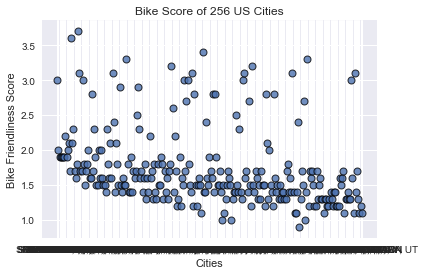

In [113]:
# Plotting the cities and their Bike Friendliness Score

plt.scatter(data_table_to_use['City_Alt'], data_table_to_use['Total Points'], edgecolor='black', linewidths=1,
            marker='o',cmap='plasma', alpha=0.8, label="Bike Score")

plt.style.use('seaborn')
plt.title(f'Bike Score of 256 US Cities')
plt.ylabel("Bike Friendliness Score")
plt.xlabel("Cities")
plt.grid(True)
plt.show()

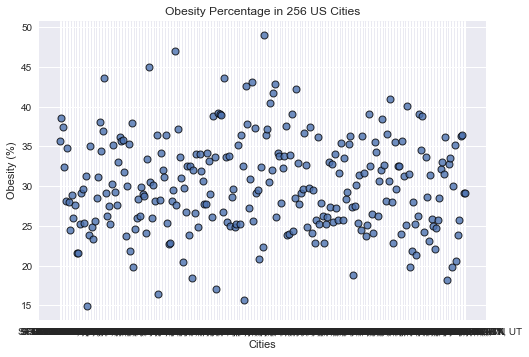

In [114]:
# Plotting the cities and their Obesity Percentage 

plt.scatter(data_table_to_use['City_Alt'], data_table_to_use['Obesity Rank'], edgecolor='black', linewidths=1,
            marker='o',cmap='viridis', alpha=0.8, label="Bike Score")

plt.style.use('seaborn-dark-palette')
plt.title(f'Obesity Percentage in 256 US Cities')
plt.ylabel("Obesity (%)")
plt.xlabel("Cities")
plt.grid(True)
plt.show()

### William Working Here

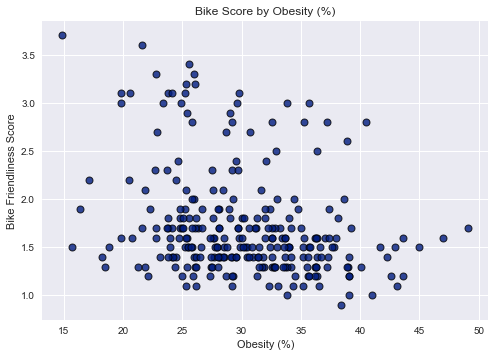

In [115]:
# Plotting the cities and their Bike Friendliness Score and Obesity

plt.scatter(data_table_to_use['Obesity Rank'], data_table_to_use['Total Points'], edgecolor='black', linewidths=1,
            marker='o',cmap='plasma', alpha=0.8, label="Bike Score")

plt.style.use('seaborn')
plt.title(f'Bike Score by Obesity (%)')
plt.ylabel("Bike Friendliness Score")
plt.xlabel("Obesity (%)")
plt.grid(True)
plt.show()

### TEST CHART 1

In [116]:
import matplotlib.pylab as plb

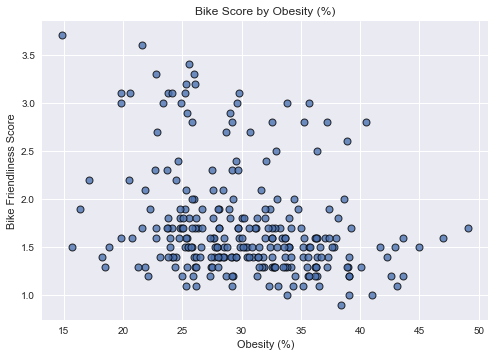

In [117]:
# Plotting the cities and their Bike Friendliness Score and Obesity

plt.scatter(data_table_to_use['Obesity Rank'], data_table_to_use['Total Points'], edgecolor='black', linewidths=1,
            marker='o',cmap='plasma', alpha=0.8, label="Bike Score")

plt.style.use('seaborn')
plt.title(f'Bike Score by Obesity (%)')
plt.ylabel("Bike Friendliness Score")
plt.xlabel("Obesity (%)")
plt.grid(True)
plt.show()

In [118]:
# Displaying differet style possible to be used on charts
plt.style.available[:15]

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook']

In [119]:
# add heat map here


In [120]:
# Binning of bike score distribution 
bins_bike = [0, .4, .9, 1.4, 1.9, 2.4, 2.9, 3.4, 3.9, 8]
bins_name = ['<.5', '.5-.9', '1-1.4', '1.5-1.9', '2-2.4','2.5-2.9','3-3.4', '3.5-3.9', '>4']

# Slice data and place into bins
data_table_to_use['Total Points'] = pd.cut(data_table_to_use["Total Points"], bins_bike, labels=bins_name)

# Group by total points and count by how many cities have total point in each bin
bin_group_bike = data_table_to_use.groupby('Total Points')
count_cat = bin_group_bike['Total Points'].count()

# Create new df to show bin df
bike_analysis_df = pd.DataFrame(count_cat)
bike_analysis_df

bike_analysis_df.rename(columns={"Total Points":"City_Count"})

C:\Users\wlaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,City_Count
Total Points,
<.5,0
.5-.9,1
1-1.4,94
1.5-1.9,115
2-2.4,22
2.5-2.9,14
3-3.4,17
3.5-3.9,2
>4,0


In [121]:
#plt.bar(bike_analysis_df['Total Points'], bike_analysis_df['City_Count'])

In [122]:
# Binning of chart of obesity rank distribution
bins_obesity = [0, 4, 9, 14, 19, 24, 29, 34, 39, 100]
bins_obesity_name = ['<4', '5-9', '10-14', '15-19', '20-24','25-29','30-34', '35-39', '>40']

# Reset index from previous binning
data_table_to_use = data_table_to_use.reset_index(drop=True)

# Group by total points and count by how many cities have total point in each bin
data_table_to_use['Obesity Rank'] = pd.cut(data_table_to_use["Obesity Rank"], bins_obesity, labels=bins_obesity_name)

# sort by obesity rank and then count how many cities are in each bin
bin_group_obesity = data_table_to_use.groupby('Obesity Rank')
count_cat = bin_group_obesity['Obesity Rank'].count()

# Create new df to showcase data
obesity_analysis_df = pd.DataFrame(count_cat)
obesity_analysis_df

obesity_analysis_df.rename(columns={"Obesity Rank":"Rank"})

,Rank
Obesity Rank,
<4,0
5-9,0
10-14,0
15-19,7
20-24,28
25-29,85
30-34,79
35-39,48
>40,18


### Top cities with the least Obesity Percentage

In [123]:
# Bar Chart of Five Least Obese Cities
obesity_percentage = [14.9, 15.7, 16.0, 16.4, 17.1]
x_axis = np.arange(len(obesity_percentage))

Text(0,0.5,'Obesity (%)')

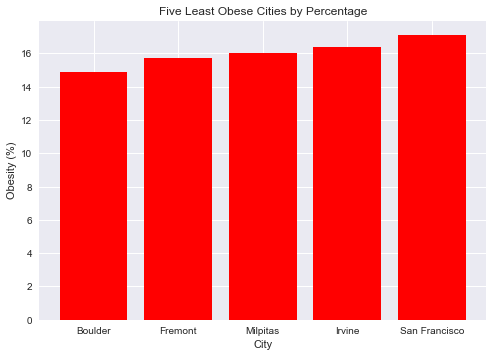

In [124]:
# Plotting and Formatting Chart
plt.bar(x_axis, obesity_percentage, color="r", align="center")

# Setting Tick Locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Boulder", "Fremont", "Milpitas", "Irvine", "San Francisco"])

# Labeling and Titling Chart
plt.title("Five Least Obese Cities by Percentage")
plt.xlabel("City")
plt.ylabel("Obesity (%)")

### TEST CHART

In [125]:
# Bar Chart of Five Least Obese Cities
obesity_percentage = [14.9, 15.7, 16.0, 16.4, 17.1, 25.3]
x_axis = np.arange(len(obesity_percentage))

Text(0,0.5,'Obesity (%)')

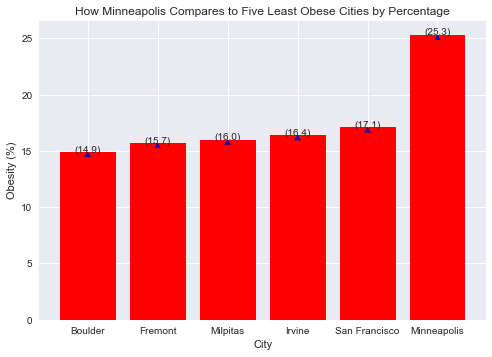

In [143]:
# Plotting and Formatting Chart
plt.bar(x_axis, obesity_percentage, color="r", align="center")


city_n=df33b['city']
i=0
for xy in zip(x_axis, obesity_percentage):                                       # <--
#     print(type(xy))
    plt.annotate('(%s)' % (obesity_percentage[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='blue',headwidth=5.9, headlength=4.9),horizontalalignment='center') 
    i=i+1



# Setting Tick Locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Boulder", "Fremont", "Milpitas", "Irvine", "San Francisco", "Minneapolis"])

# Labeling and Titling Chart
plt.title("How Minneapolis Compares to Five Least Obese Cities by Percentage")
plt.xlabel("City")
plt.ylabel("Obesity (%)")

In [134]:
# te
city_n

0         Milpitas
3          Fremont
2           Irvine
5    San Francisco
4      Minneapolis
1          Boulder
Name: city, dtype: object

In [28]:
# Preparing the x and y axis data for plot 
df0 = obesity_data_rn[['City Name','Population']]
df0["Population"] = df0["Population"].str.replace(",","").astype(int)
df1 = df0[:5]
df1 = df1.sort_values('Population',ascending=True)
df1

C:\Users\wlaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,City Name,Population
2,Milpitas,66790
0,Boulder,97385
3,Irvine,212375
1,Fremont,214089
4,San Francisco,805235


In [74]:
# Minneapolis Data adding and forming a new frame  just like i prepared data for each graph b4 plotting

dfa=obesity_data_rn[:5]
dfb=obesity_data_rn[136:137]
dfc=pd.concat([dfa,dfb])
dfd=dfc[['City Name','Population']]
dfd['Population']=dfd['Population'].str.replace(",","").astype(int)
dfe=dfd.sort_values(by='Population')
dfe=dfe.reset_index()
del dfe['index']
dfe

C:\Users\wlaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,City Name,Population
0,Milpitas,66790
1,Boulder,97385
2,Irvine,212375
3,Fremont,214089
4,Minneapolis,382578
5,San Francisco,805235


Text(0,0.5,'Population')

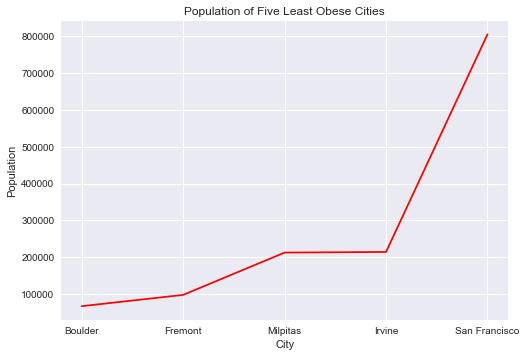

In [31]:
# Plotting Population by Five Least Obese Cities
x_axis=df2['City Name']      
y_axis=df1['Population']
plt.plot(x_axis, y_axis, color="r")

#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ['Boulder', 'Fremont', 'Milpitas', 'Irvine', 'San Francisco'])
#Labeling and Titling Chart

plt.title("Population of Five Least Obese Cities")
plt.xlabel("City")
plt.ylabel("Population")

### TEST CHART

In [75]:
# Minneapolis Data adding and forming a new frame  just like i prepared data for each graph b4 plotting

dfa=obesity_data_rn[:5]
dfb=obesity_data_rn[136:137]
dfc=pd.concat([dfa,dfb])
dfd=dfc[['City Name','Population']]
dfd['Population']=dfd['Population'].str.replace(",","").astype(int)
dfe=dfd.sort_values(by='Population')
dfe=dfe.reset_index()
del dfe['index']
dfe

C:\Users\wlaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,City Name,Population
0,Milpitas,66790
1,Boulder,97385
2,Irvine,212375
3,Fremont,214089
4,Minneapolis,382578
5,San Francisco,805235


In [76]:
dfe['City Name']
# dfe['Population']

0         Milpitas
1          Boulder
2           Irvine
3          Fremont
4      Minneapolis
5    San Francisco
Name: City Name, dtype: object

In [77]:
dfe['Population']

0     66790
1     97385
2    212375
3    214089
4    382578
5    805235
Name: Population, dtype: int32

Text(0,0.5,'Population')

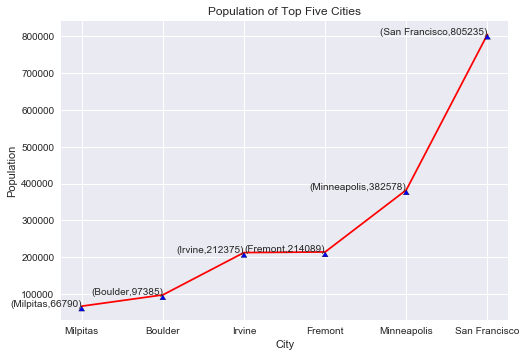

In [80]:
# First Plot ( Redone by WASIM)



x_axis = dfe['City Name']      
y_axis= dfe['Population']

n= list(y_axis)
plt.plot(x_axis, y_axis, color="r")

i=0
for xy in zip(x_axis, y_axis):                                       # <--
#     print(type(xy))
    plt.annotate('(%s,%s)' % (x_axis[i], y_axis[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='blue',headwidth=5.9, headlength=4.9),horizontalalignment='right') 
    i=i+1

# for i, txt in enumerate(y):
#     plt.annotate(txt, (x_axis[i], y_axis[i]))

plt.title("Population of Top Five Cities")
plt.xlabel("City")
plt.ylabel("Population")

Text(0,0.5,'Population')

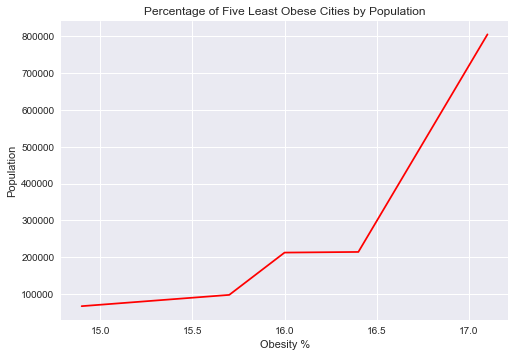

In [33]:
#Plotting Percentage of Five Least Obese Cities by Population

#Setting x and y axis data_table_to_plot.plot(kind='line',x='City_Alt',y='Population_x', color='red')
#obesity_percentage = [14.9, 15.7, 16.0, 16.4, 17.1]
x_axis = df2['Obesity Rank']      
y_axis= df1['Population']
plt.plot(x_axis, y_axis, color="r")

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ['Boulder', 'Fremont', 'Milpitas', 'Irvine', 'San Francisco'])
#Labeling and Titling Chart

plt.title("Percentage of Five Least Obese Cities by Population")
plt.xlabel("Obesity %")
plt.ylabel("Population")

### Bike Friendliness Score vs Population

In [34]:
# Creating DataFrame of Bike_Score=data_table_to_use['Total Points']
pop_series = ['Milpitas', 'Boulder','Irvine','Fremont', 'San Francisco']
Bike_Score = ['','3.7','1.9','1.5','2.2']
y_axis = df1['Population']
y = list(y_axis)
df3 = pd.DataFrame({'Bike_Score':Bike_Score,'Population':y,'city':pop_series})
df3b = df3.sort_values(by='Bike_Score')
df3b

,Bike_Score,Population,city
0,,66790,Milpitas
3,1.5,214089,Fremont
2,1.9,212375,Irvine
4,2.2,805235,San Francisco
1,3.7,97385,Boulder


Text(0,0.5,'Population')

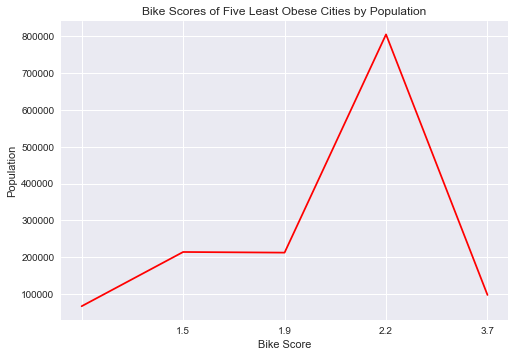

In [35]:
#Plotting Bike Scores of Five Least Obese Cities by Population

#Setting x and y axis for plotting
x_axis = df3b['Bike_Score']    
y_axis = df3b['Population']
plt.plot(x_axis, y_axis, color="r")

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ['Boulder', 'Fremont', 'Milpitas', 'Irvine', 'San Francisco'])
#Labeling and Titling Chart

plt.title("Bike Scores of Five Least Obese Cities by Population")
plt.xlabel("Bike Score")
plt.ylabel("Population")

### TEST CHART

In [81]:
# Minneapolis Data adding and forming a new frame  just like i prepared data for each graph b4 plotting

dfa=obesity_data_rn[:5]
dfb=obesity_data_rn[136:137]
dfc=pd.concat([dfa,dfb])
dfd=dfc[['City Name','Population']]
dfd['Population']=dfd['Population'].str.replace(",","").astype(int)
dfe=dfd.sort_values(by='Population')
dfe=dfe.reset_index()
del dfe['index']
dfe

C:\Users\wlaik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,City Name,Population
0,Milpitas,66790
1,Boulder,97385
2,Irvine,212375
3,Fremont,214089
4,Minneapolis,382578
5,San Francisco,805235


In [83]:
dfe['Population']

0     66790
1     97385
2    212375
3    214089
4    382578
5    805235
Name: Population, dtype: int32

In [90]:
df33

,Bike_Score,Population,city
0,0,66790,Milpitas
1,3.7,97385,Boulder
2,1.9,212375,Irvine
3,1.5,214089,Fremont
4,3.2,382578,Minneapolis
5,2.2,805235,San Francisco


In [91]:
# Data prepration continued...
# Bike_Score=data_table_to_use['Total Points']
pop_series= ['Milpitas', 'Boulder','Irvine','Fremont','Minneapolis', 'San Francisco']
Bike_Score=['0','3.7','1.9','1.5','3.2','2.2']
y_axis= dfe['Population']
y= list(y_axis)
df33=pd.DataFrame({'Bike_Score':Bike_Score,'Population':y,  'city':pop_series})
df33b=df33.sort_values(by='Bike_Score')
df33b

,Bike_Score,Population,city
0,0,66790,Milpitas
3,1.5,214089,Fremont
2,1.9,212375,Irvine
5,2.2,805235,San Francisco
4,3.2,382578,Minneapolis
1,3.7,97385,Boulder


Text(0,0.5,'Population')

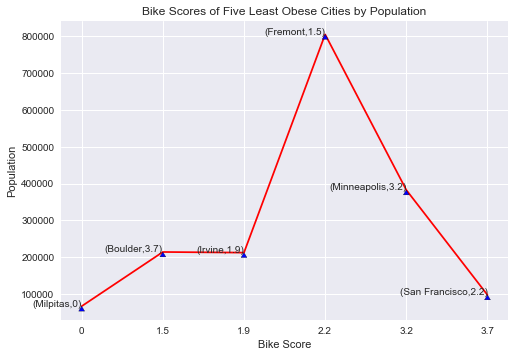

In [94]:
# Reploted test2

#Plotting Bike Scores of Five Least Obese Cities by Population

#Setting x and y axis for plotting
x_axis = df33b['Bike_Score']    
y_axis = df33b['Population']
plt.plot(x_axis, y_axis, color="r")
city_n=df33b['city']
i=0
for xy in zip(x_axis, y_axis):                                       # <--
#     print(type(xy))
    plt.annotate('(%s,%s)' % (city_n[i],x_axis[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='blue',headwidth=5.9, headlength=4.9),horizontalalignment='right') 
    i=i+1

# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ['Boulder', 'Fremont', 'Milpitas', 'Irvine', 'San Francisco'])
#Labeling and Titling Chart

plt.title("Bike Scores of Five Least Obese Cities by Population")
plt.xlabel("Bike Score")
plt.ylabel("Population")

Text(0,0.5,'Population')

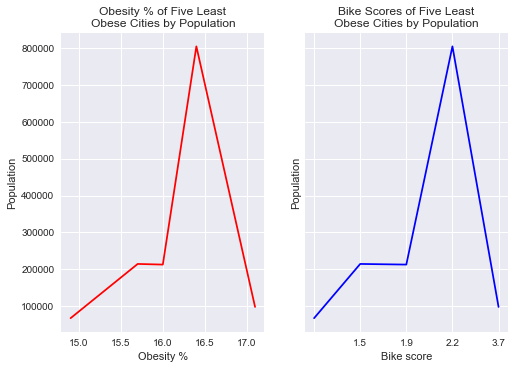

In [37]:
#Plotting Population and Obesity % & 
#Plotting Population and Bike Scores side by side
#Five Least Obese Cities

x1_axis = df2['Obesity Rank']  
x2_axis = df3b['Bike_Score']     
y_axis= df3b['Population']

#Creating subplots
f, (ax1, ax2) = plt.subplots(1, 2, sharey='row')

#Plotting obesity
ax1.plot(x1_axis, y_axis, color="r")
ax1.set_title('Obesity')
ax1.set_title("Obesity % of Five Least\nObese Cities by Population")
ax1.set_xlabel("Obesity %")
ax1.set_ylabel("Population")

#Plotting Bike Scores (Milpitas did not have a Bike Score)
ax2.plot(x2_axis, y_axis, color="b")
ax2.set_title("Bike Scores of Five Least\nObese Cities by Population")
ax2.set_xlabel("Bike score")
ax2.set_ylabel("Population")

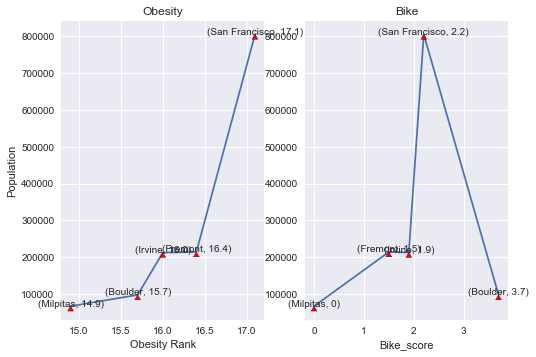

In [95]:
# Adding tis graph because above graph is inncorrect

## two sub plots together

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
# np.random.seed(19680801)

# # make up some data in the interval ]0, 1[
# # y = np.random.normal(loc=0.5, scale=0.4, size=1000)
# # y = y[(y > 0) & (y < 1)]
# # y.sort()
# # x = np.arange(len(y))


# linear Obesity
labels1 = df1['City Name']  
n= list(labels1)

x1_Obesity = [14.9, 15.7, 16.0, 16.4, 17.1]     
y1_Obesity= [66790.0, 97385.0, 212375.0, 214089.0, 805235.0]



# plot with various axes scales
plt.figure()


plt.subplot(121)
plt.plot(x1_Obesity, y1_Obesity)
plt.yscale('linear')
plt.title('Obesity')
# plt.grid(True)
plt.xlabel("Obesity Rank")
plt.ylabel("Population")

i=0
x_=list( df1['City Name'] )
for xy in zip(x1_Obesity, y1_Obesity):
    # <--
#     print(type(xy))
    plt.annotate('(%s, %s)' %(x_[i],x1_Obesity[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='red',headwidth=5.9, headlength=4.9),horizontalalignment='center') 
    i=i+1

    
    
    
# log Bike    
labels2=['Milpitas','Fremont','Irvine','San Francisco','Boulder']
n= list(labels2)
x2_Bike= [0, 1.5, 1.9, 2.2, 3.7] 
y2_Bike=[66790.0,214089.0,212375.0,805235.0,97385.0] 

plt.subplot(122)
plt.plot(x2_Bike, y2_Bike)
plt.yscale('linear')
plt.title('Bike')
plt.grid(True)
plt.xlabel("Bike_score")
# plt.ylabel("Population")

i=0
x_=labels2
for xy in zip(x2_Bike, y2_Bike):
    # <--
#     print(type(xy))
    plt.annotate('(%s, %s)' %(x_[i],x2_Bike[i]), xy=xy,xytext=xy, textcoords='data',arrowprops=dict(facecolor='red',headwidth=5.9, headlength=4.9),horizontalalignment='center') 
    i=i+1

### DON'T USE

Text(0,0.5,'Obesity (%)')

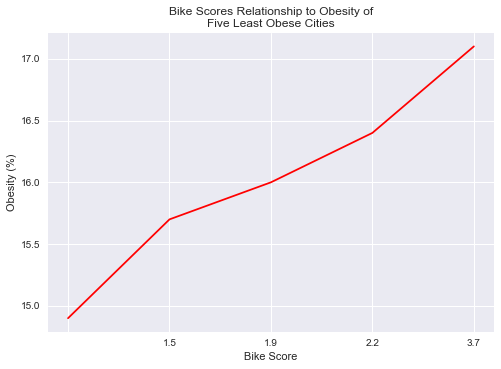

In [38]:
x_axis = df3b['Bike_Score'] 
y_axis = df2['Obesity Rank'] 
plt.plot(x_axis, y_axis, color="r")

plt.title("Bike Scores Relationship to Obesity of\nFive Least Obese Cities")
plt.xlabel("Bike Score")
plt.ylabel("Obesity (%)")